<a href="https://colab.research.google.com/github/Tatsuyuki-Matsuda/EU_M_Math-Repository/blob/main/Chap03_Cm_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests, zipfile
from io import StringIO
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip'

r = requests.get(url, stream=True)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()

In [2]:
import pandas as pd
student_data_math = pd.read_csv('student-mat.csv', sep=';')

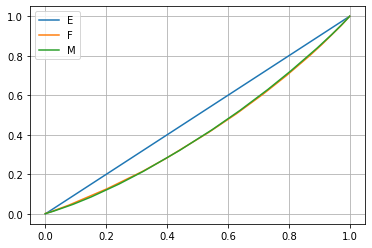

In [3]:
#Comprehensive 3-2-1
#データの抽出
F_data = student_data_math[student_data_math['sex'] == 'F']
M_data = student_data_math[student_data_math['sex'] == 'M']

#データの並び替え
F_data_G1_sort = F_data.G1.sort_values()
M_data_G1_sort = M_data.G1.sort_values()

#データと同じ長さの行列を作成
import numpy as np
F_data_len = np.arange(len(F_data))
M_data_len = np.arange(len(M_data))

#累積相対度数
F_data_deg = F_data_len/F_data_len.max()
M_data_deg = M_data_len/M_data_len.max()

#累積比率
M_data_G1_sort_ratio = M_data_G1_sort.cumsum() / M_data_G1_sort.sum()
F_data_G1_sort_ratio = F_data_G1_sort.cumsum() / F_data_G1_sort.sum()

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#横軸:累積相対度数　縦軸:累積比率
plt.plot(F_data_deg, F_data_deg, label = 'E')
plt.plot(F_data_deg, F_data_G1_sort_ratio, label = 'F')
plt.plot(M_data_deg, M_data_G1_sort_ratio, label = 'M')
plt.legend()
plt.grid(True)

In [4]:
#Comprehensive 3-2-2
def mean_dif(data):
  subt = []
  for i in range(0, len(data)-1):
    for j in range(i+1, len(data)):
      subt.append(np.abs(data[i] - data[j]))
  return float(sum(subt))*2 / (len(data) ** 2)

def gini(mean_dif, data):
  return mean_dif / (2* np.mean(data))

print('男性の数学の成績に関するジニ係数 :', gini(mean_dif(np.array(M_data_G1_sort)), np.array(M_data_G1_sort)))
print('女性の数学の成績に関するジニ係数 :', gini(mean_dif(np.array(F_data_G1_sort)), np.array(F_data_G1_sort)))

男性の数学の成績に関するジニ係数 : 0.17197351667939903
女性の数学の成績に関するジニ係数 : 0.1723782950865341
